#**SVM-Group 3**

# **Linearly separable data**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Load iris dataset
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = df[df['target'] != 2][['petal length (cm)','petal width (cm)']].values
y = df[df['target'] != 2]['target']

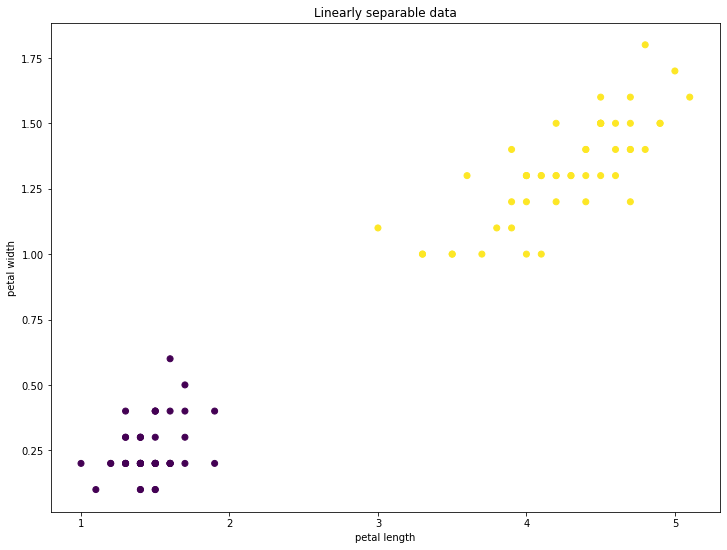

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Linearly separable data')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

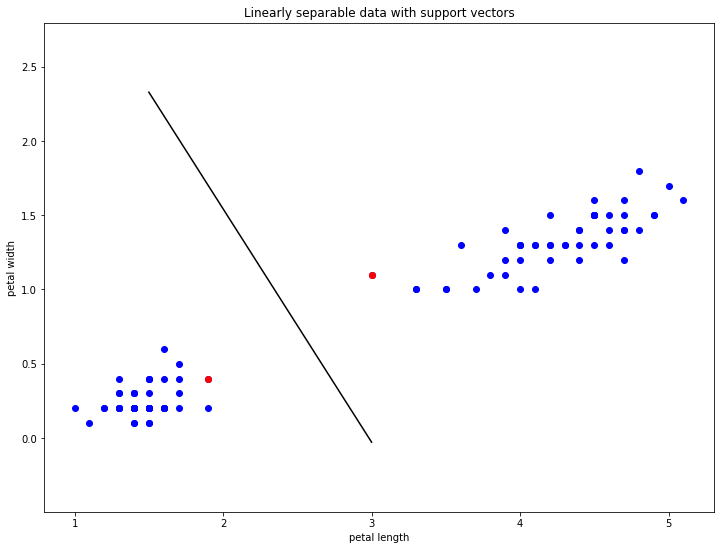

In [ ]:
plt.figure(figsize=(12,9))
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X[:,0], X[:,1], color='blue')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')

# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(1.5, 3)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, color='black')

plt.title('Linearly separable data with support vectors')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.axis('equal')
plt.show()

# **Soft-Margin**

In [ ]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages

means = [[2, 2], [4, 1]]
cov = [[.6, .4], [.4, .6]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.3, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

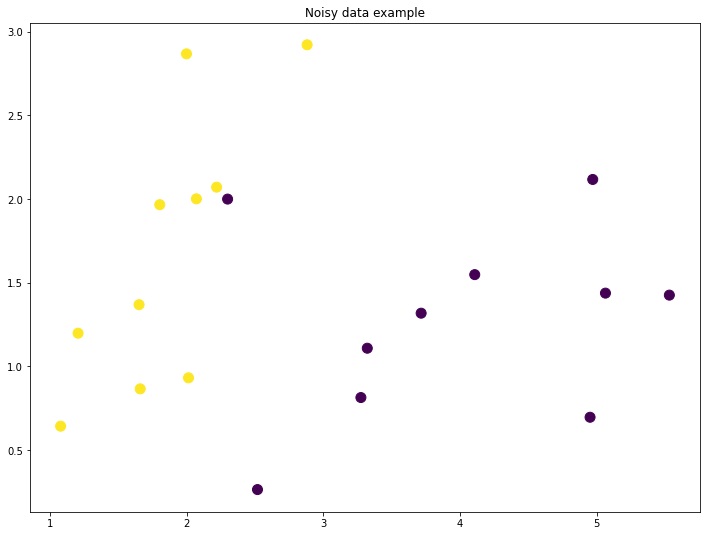

In [ ]:
plt.figure(figsize=(12,9))
plt.title("Noisy data example")
plt.scatter(X[0], X[1], c=y, s=100)

In [ ]:
from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X.T, y[0])

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]
print(w_sklearn.T, b_sklearn)

[[-2.5147265   1.09582348]] 5.044089760542074


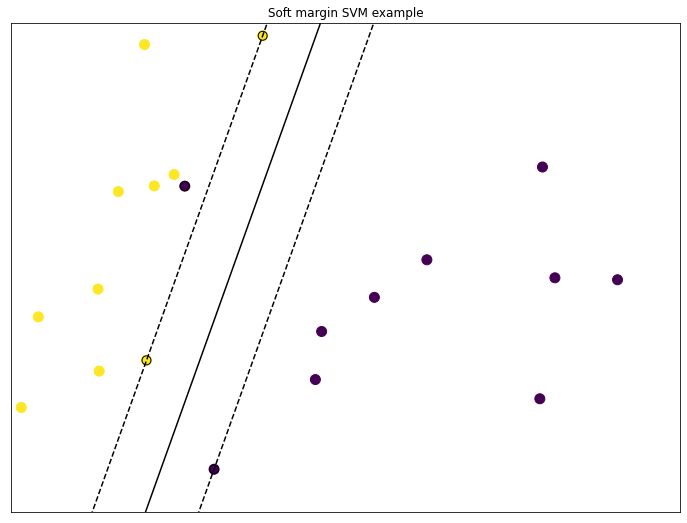

In [ ]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(12, 9))
plt.title("Soft margin SVM example")
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k',
            cmap=cm.get_cmap('RdBu'))
plt.scatter(X[0], X[1], c=y, s=100)

plt.axis('tight')
x_min = 1
x_max = 6
y_min = 0
y_max = 3

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Put the result into a contour plot
# plt.contourf(XX, YY, Z, cmap=cm.get_cmap('bwr'),
#               alpha=0.5, linestyles=['-'])

plt.xlim(1, 6)
plt.ylim(0, 3)

plt.xticks(())
plt.yticks(())
plt.show()

# **Kernel**

Load Data Iris

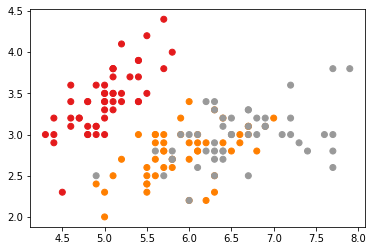

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Load iris dataset
iris = datasets.load_iris()

## Create features and target data
X = iris.data[:, :2]
y = iris.target

## Plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

## **Linear Kernel**

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

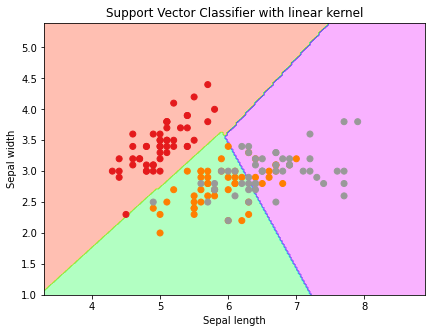

In [ ]:
svc_classifier = svm.SVC(kernel='linear').fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

## **Sigmod kernel**

[]

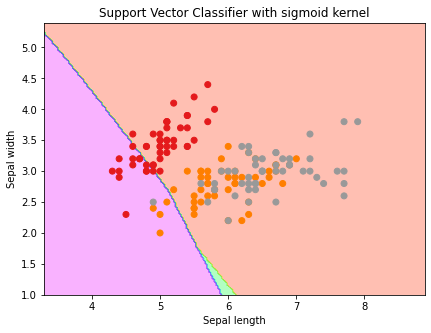

In [ ]:
## Sigmoid kernel
svc_classifier = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with sigmoid kernel')
plt.plot()

## **RBF Kernel**

[]

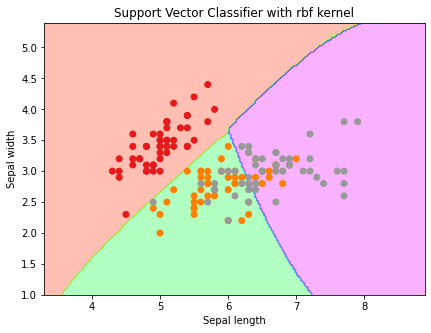

In [ ]:
## rbf kernel
svc_classifier = svm.SVC(kernel='rbf', C=C).fit(X, y)
C=1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating plots
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')
plt.plot()

## **Polinomial Kernel**

[]

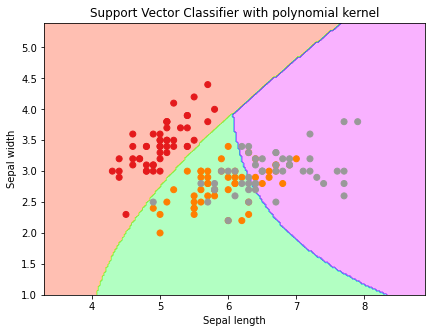

In [ ]:
## Polynomial kernel
svc_classifier = svm.SVC(kernel='poly', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating the graph
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with polynomial kernel')
plt.plot()

#**Multi-Class Classification**

##**Import Library**

In [ ]:
%%capture
%%shell
pip install mglearn

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import mglearn
# Configuration options
num_samples_total = 1000
cluster_centers = [(5,5), (3,3), (1,5)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

##**Split Data**

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# np.save('./clusters.npy', X)
#X = np.load('./clusters.npy')

# Create the SVM
svm = LinearSVC(random_state=42)

##**One vs One**

In [ ]:
#class 0 vs 1
svm0 = LinearSVC(random_state=42)
svm0.fit(X_train[y_train!=2],y_train[y_train!=2])

#class 1 vs 2
svm1 = LinearSVC(random_state=42)
svm1.fit(X_train[y_train!=0],y_train[y_train!=0])

#class 2 vs 3
svm2 = LinearSVC(random_state=42)
svm2.fit(X_train[y_train!=1],y_train[y_train!=1])

svmAll=[svm0,svm1,svm2]

# Make it an OvO classifier
ovo_classifier = OneVsOneClassifier(svm)

# Fit the data to the OvO classifier
ovo_classifier = ovo_classifier.fit(X_train, y_train)

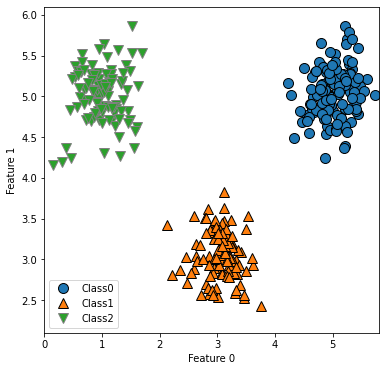

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
ax=axes
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
ax.set(xlabel='Feature 0',ylabel='Feature 1')
ax.legend(['Class0', 'Class1', 'Class2'])
ax.set_xlim([0,5.8])
ax.set_ylim([2.1,6.1])
plt.show()

-0.5945004282628612 : -0.5845098776708231 : 4.7114858090613945
-1.174476871690622 : 0.6072427184887608 : -0.14642082680096757
-0.7557429811091627 : 0.4197280020380084 : 0.13075896325245492


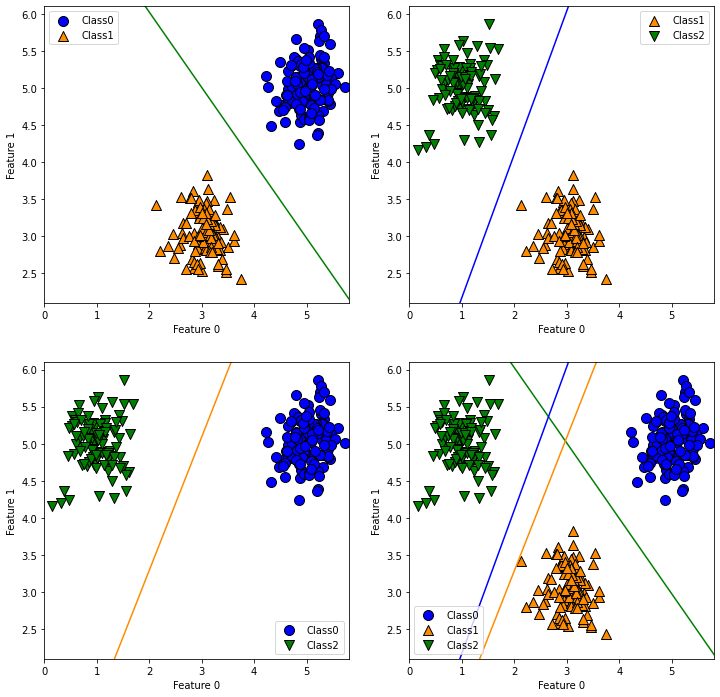

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax,ignore in zip(axes.flat,[2,0,1,5]):
  #mglearn.discrete_scatter(X_test[y_test!=ignore][:,0], X_test[y_test!=ignore][:,1], y_test[y_test!=ignore],ax=ax)
  for i,marker,color in zip(range(3),['o','^','v'],['b','darkorange','g']):
    if i==ignore:
      continue
    ax.scatter(X_test[y_test==i][:,0], X_test[y_test==i][:,1],marker=marker,color=color,edgecolors='black',s=100)
  ax.set(xlabel='Feature 0',ylabel='Feature 1')
  ax.set_xlim([0,5.8])
  ax.set_ylim([2.1,6.1])
  class_name=['Class0', 'Class1', 'Class2']
  if(ignore !=5):
    del class_name[ignore]
  ax.legend(class_name)

line = np.linspace(-15,15)
for estimators, color,ax in zip(svmAll, ['g', 'b', 'darkorange'],axes.flat[0:3]):
  #print('coef is ', estimators.coef_[0], estimators.intercept_[0], color)
    ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
    print("{} : {} : {}".format(estimators.coef_[0][0],estimators.coef_[0][1],estimators.intercept_[0]))
#plt.title('Multiclass classification')

for estimators, color in zip(svmAll, ['g', 'b', 'darkorange']):
    axes.flat[3].plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
plt.show()

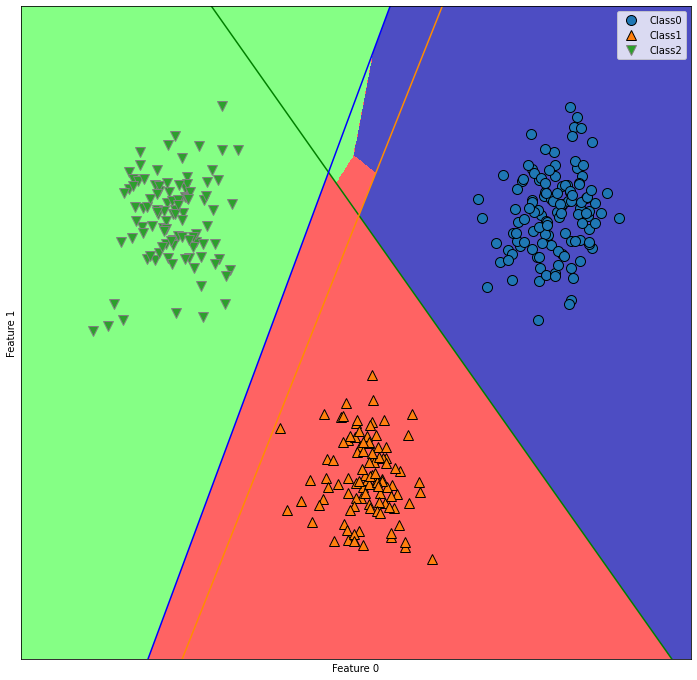

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
ax=axes

mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
ax.set(xlabel='Feature 0',ylabel='Feature 1')
ax.legend(['Class0', 'Class1', 'Class2'])

line = np.linspace(-15,15)
for estimators, color in zip(svmAll, ['g', 'b', 'darkorange']):
    ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
mglearn.plots.plot_2d_classification(ovo_classifier, X_test, fill=True, alpha=.7)
plt.show()

##**One Vs Rest**

In [ ]:
#class 0 vs [1,2]
y_train_0=y_train.copy()
y_train_0 = np.where(y_train_0 == 2, 1, y_train_0)
svm0 = LinearSVC(random_state=42)
svm0.fit(X_train,y_train_0)

#class 1 vs [0,2]
y_train_1=y_train.copy()
y_train_1 = np.where(y_train_1 == 2, 0, y_train_1)
svm1 = LinearSVC(random_state=42)
svm1.fit(X_train,y_train_1)

#class 2 vs [0,1]
y_train_2=y_train.copy()
y_train_2 = np.where(y_train_2 == 1, 0, y_train_2)
svm2 = LinearSVC(random_state=42)
svm2.fit(X_train,y_train_2)

svmAll=[svm0,svm1,svm2]
# Make it an OvR classifier
ovr_classifier = OneVsRestClassifier(svm)

# Fit the data to the OvR classifier
ovr_classifier = ovr_classifier.fit(X_train, y_train)

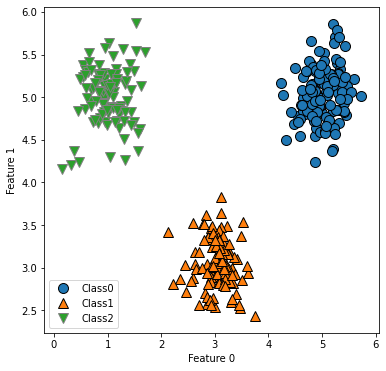

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
ax=axes
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
ax.set(xlabel='Feature 0',ylabel='Feature 1')
ax.legend(['Class0', 'Class1', 'Class2'])
plt.show()

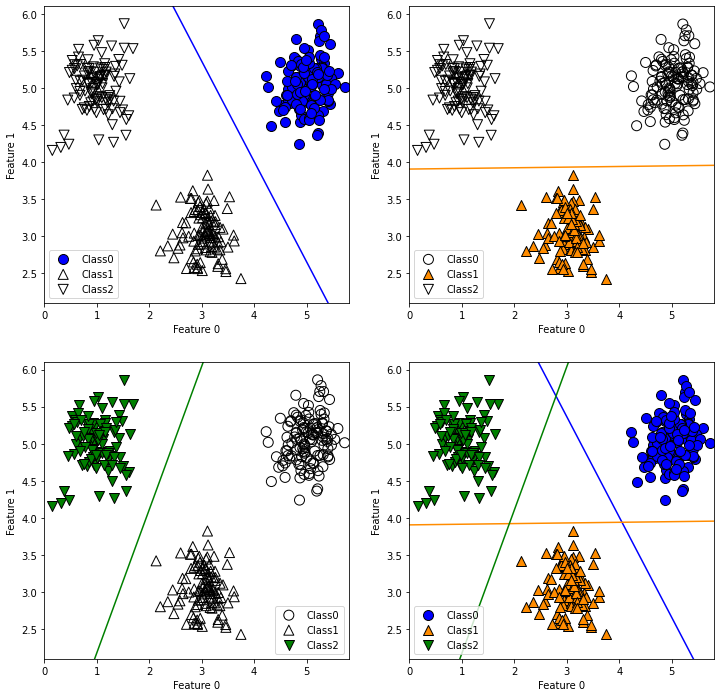

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax,select in zip(axes.flat,[0,1,2,5]):
  #mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
  for i,marker,color in zip(range(3),['o','^','v'],['b','darkorange','g']):
    if i==select or select ==5:
      ax.scatter(X_test[y_test==i][:,0], X_test[y_test==i][:,1],marker=marker,color=color,edgecolors='black',s=100)
    else:
      ax.scatter(X_test[y_test==i][:,0], X_test[y_test==i][:,1],marker=marker,facecolors='none', edgecolors='black',s=100)
  ax.set_xlim([0,5.8])
  ax.set_ylim([2.1,6.1])
  ax.set(xlabel='Feature 0',ylabel='Feature 1')
  ax.legend(['Class0', 'Class1', 'Class2'])

line = np.linspace(-15,15)
for estimators, color,ax in zip(svmAll, ['b', 'darkorange', 'g'],axes.flat[0:3]):
  #print('coef is ', estimators.coef_[0], estimators.intercept_[0], color)
    ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
#plt.title('Multiclass classification')

for estimators, color in zip(svmAll, ['b', 'darkorange', 'g']):
    axes.flat[3].plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
plt.show()

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# for ax in axes.flat:
#   mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
#   ax.set(xlabel='Feature 0',ylabel='Feature 1')
#   ax.legend(['Class0', 'Class1', 'Class2'])

# line = np.linspace(-15,15)
# for estimators, color,ax in zip(svmAll, ['b', 'r', 'g'],axes.flat[0:3]):
#   #print('coef is ', estimators.coef_[0], estimators.intercept_[0], color)
#     ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
# #plt.title('Multiclass classification')

# for estimators, color in zip(svmAll, ['b', 'r', 'g']):
#     axes.flat[3].plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
# plt.show()

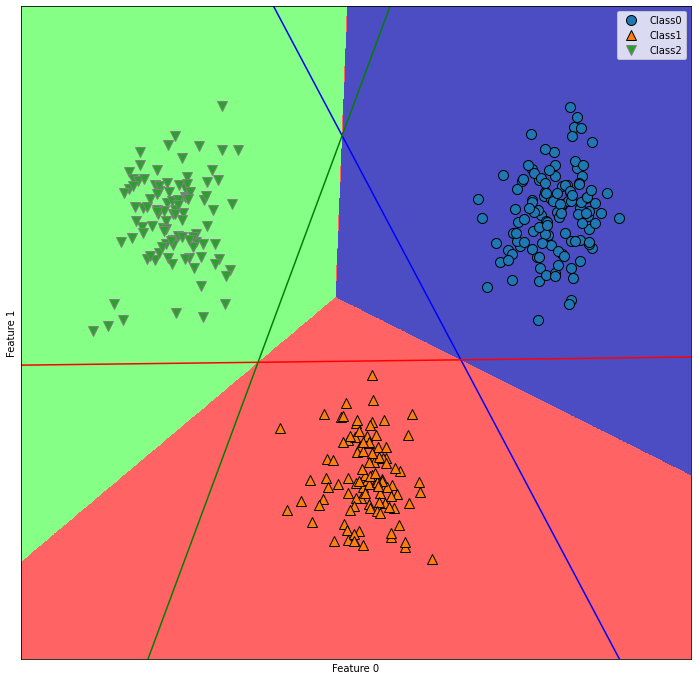

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
ax=axes

mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,ax=ax)
ax.set(xlabel='Feature 0',ylabel='Feature 1')
ax.legend(['Class0', 'Class1', 'Class2'])

line = np.linspace(-15,15)
for estimators, color in zip(svmAll, ['b', 'r', 'g']):
    ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
mglearn.plots.plot_2d_classification(ovr_classifier, X_test, fill=True, alpha=.7)
plt.show()


$$margin=\underset{i}{min} \left( \frac{y_i(w^TX_i+b}{\| w \|_2} \right)$$
<br/>
$$(w,b)=\underset{argmax}{w,b} \left[ \underset{i}{min} \left( \frac{y_i(w^TX_i+b)}{|| w||_2} \right) \right]$$
<br/>
$$w^Tx+b$$




# **Demo - Iris Dataset**

The Iris dataset can be found on [the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris) and [Kaggle](https://www.kaggle.com/uciml/iris)

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

-  Id
-  SepalLengthCm
-  SepalWidthCm
-  PetalLengthCm
-  PetalWidthCm
-  Species


In [ ]:
%%capture
%%shell
pip install mglearn

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split 
from sklearn import svm as SVM 
from sklearn import metrics 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import mglearn

In [ ]:
iris = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT8nHQgxmQ6L4x7ozcW7Z5dsk9AEz6BXyeHOaeEZ0PnjRd2GwcVqBUvw_8O2d9L5QDMotMdxTbzWaCM/pub?output=csv")

In [ ]:
iris.astype({'SepalLengthCm': 'float64','SepalWidthCm':'float64','PetalLengthCm':'float64','PetalWidthCm':'float64'})
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
iris.drop('Id',axis=1,inplace=True)
iris.columns=iris.columns.str.replace('Cm','')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##**Visualization**

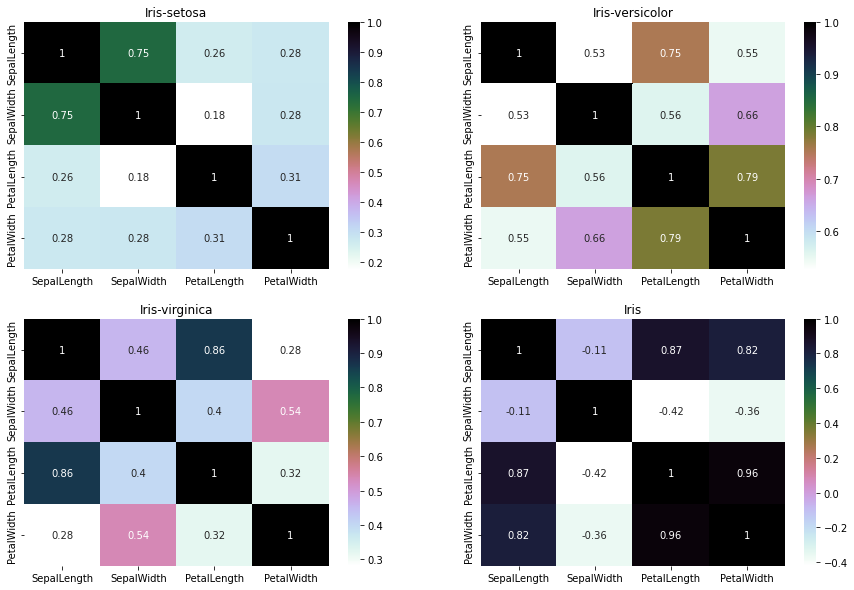

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
for specie,ax in zip(iris.Species.unique(),axs.flatten()[0:4]):
  sns.heatmap(iris[iris.Species==specie].corr(),annot=True,cmap='cubehelix_r',ax = ax)
  ax.title.set_text(specie)
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r',ax = axs[1,1])
axs[1,1].title.set_text('Iris')

**Observation**

- The Petal Width and Petal Lenght are highly correlated
- The Petal Length and Sepal Length are highly correlated
- The Sepal Width is not correlated with the others

Can we  use only 2 features for training the SVM?

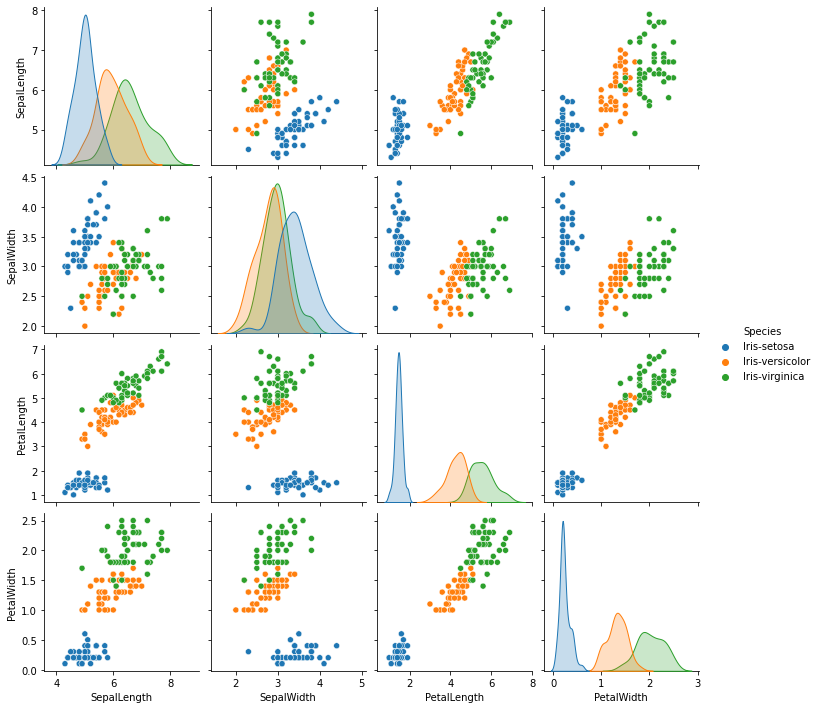

In [ ]:
g0=sns.pairplot(iris,hue='Species')
plt.show()

**Observation**

Linearly Separated:
- PetalWidth + Petal Length
- PetalWidth + Sepal Width
- PetalWidth + Sepal Length
- PetalLength + Sepal Width
- PetalLength + Sepal Length

##**Support Vector Machine**

In [ ]:
iris['Species1']=pd.factorize(iris.Species)[0]
train, test = train_test_split(iris, test_size = 0.6)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)
train.head(2)

(60, 6)
(90, 6)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Species1
91,6.1,3.0,4.6,1.4,Iris-versicolor,1
18,5.7,3.8,1.7,0.3,Iris-setosa,0


In [ ]:
train_X = train.iloc[:, [0,1,2,3]]# taking the training data features
train_y=train.Species1# output of our training data
test_X= test.iloc[:, [0,1,2,3]] # taking test data features
test_y =test.Species1   #output value of test data

### **Using all features**
We will use all the features for training the SVM and check the accuracy.

The accuracy of the SVM is: 0.9222222222222223


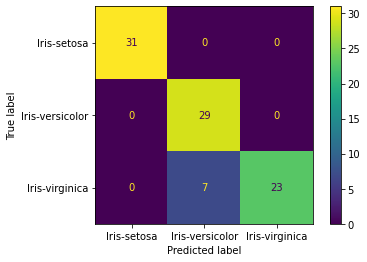

In [ ]:
model = SVM.SVC() #select the algorithm
model.fit(train_X,train.Species) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test.Species))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output
plot_confusion_matrix(model, test_X, test.Species) 

###**Using 2 features**
We will use SepalWidth and PetalWidth for training the SVM and check the accuracy.

In [ ]:
train_X.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
146,6.3,2.5,5.0,1.9
61,5.9,3.0,4.2,1.5


In [ ]:
pair_features = [['PetalWidth','PetalLength'],['PetalWidth','SepalWidth'],['PetalWidth','SepalLength'],
                ['PetalLength','SepalWidth'],['PetalLength','SepalLength'],['SepalWidth','SepalLength']]

In [ ]:
def plot_boundary(test_X,test_y,classifier,ax,feature_name,accuracy_score,svmAll=[],boundary=True,pairplot=False):
  mglearn.discrete_scatter(test_X[:,0], test_X[:,1], test_y,ax=ax)
  ax.set(xlabel=feature_name[0],ylabel=feature_name[1])
  ax.legend(['Setosa', 'Versicolor', 'Virginica 	'])
  ax.title.set_text('Accuracy: {0:.2f}'.format(accuracy_score))
  line = np.linspace(-15,15)
  if pairplot:
    if len(svmAll) == 0:
      for estimators, color in zip(classifier.estimators_, ['g', 'r', 'b']):
          ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
    else:
      for estimators, color in zip(svmAll, ['b', 'r', 'g']):
        ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)

  if boundary:
    mglearn.plots.plot_2d_classification(classifier,test_X, fill=True, alpha=.7,ax=ax)

####**One vs One method**

In [ ]:
def oneVsone (train_X,train_y):
  svm = LinearSVC(random_state=42,C=0.5)
  # Make it an OvO classifier
  ovo_classifier = OneVsOneClassifier(svm)
  # Fit the data to the OvR classifier
  ovo_classifier = ovo_classifier.fit(train_X, train_y)
  prediction=ovo_classifier.predict(test_X) #now we pass the testing data to the trained algorithm
  #print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
  #we pass the predicted output by the model and the actual output
  #plot_confusion_matrix(ovo_classifier, test_X, test_y)  
  accuracy_score =metrics.accuracy_score(prediction,test_y) 
  return [ovo_classifier,accuracy_score]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


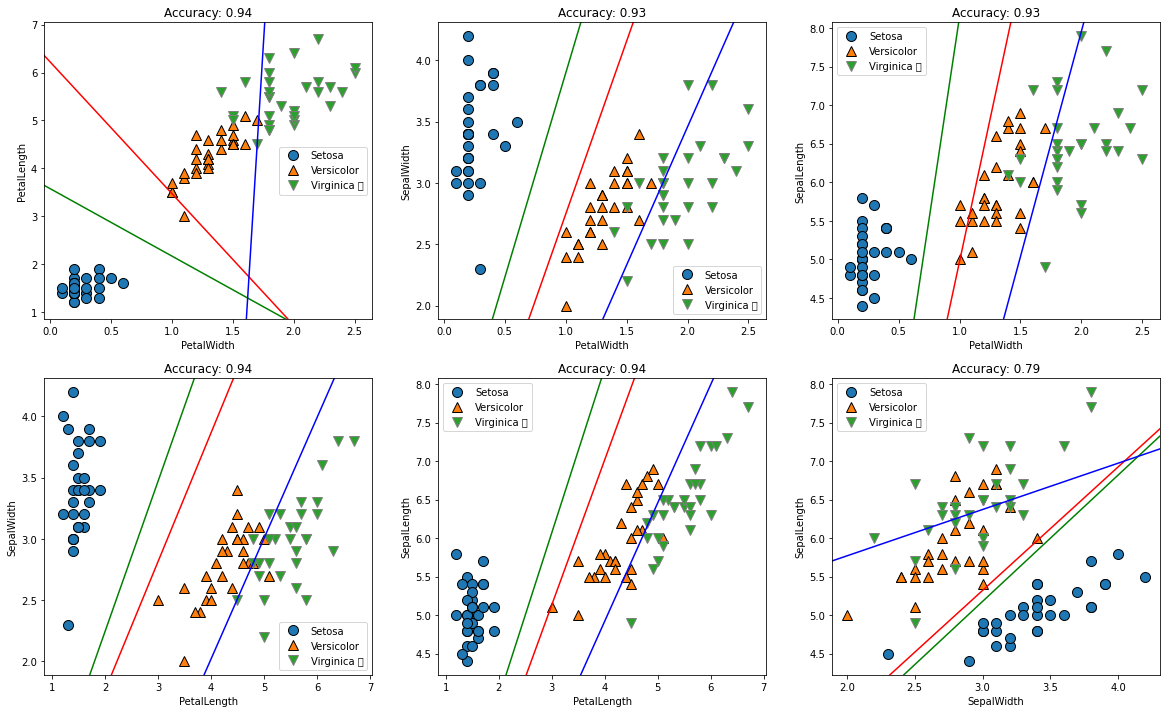

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for ax,feature_name in zip(axes.flatten(),pair_features):
  train_X = train[feature_name].to_numpy()# taking the training data features
  train_y=train.Species1.to_numpy()# output of our training data
  test_X= test[feature_name].to_numpy() # taking test data features
  test_y =test.Species1.to_numpy()   #output value of test data
  ovo_classifier,accuracy_score = oneVsone (train_X,train_y)
  plot_boundary(test_X,test_y,ovo_classifier,ax,feature_name,accuracy_score,boundary=False,pairplot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


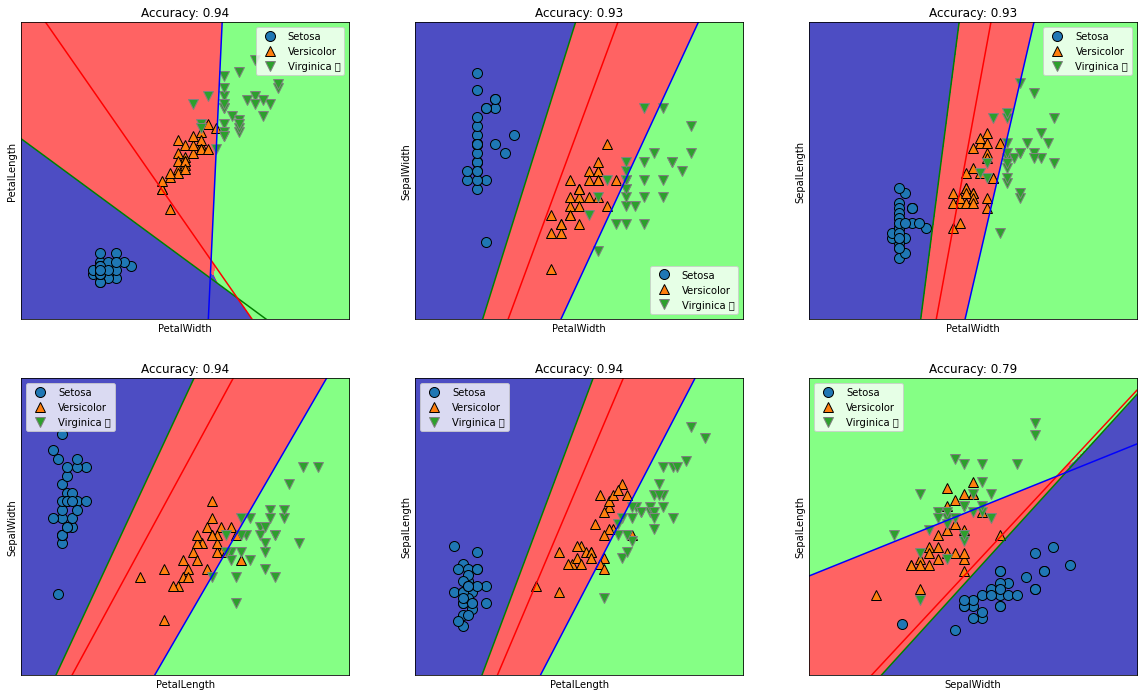

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for ax,feature_name in zip(axes.flatten(),pair_features):
  train_X = train[feature_name].to_numpy()# taking the training data features
  train_y=train.Species1.to_numpy()# output of our training data
  test_X= test[feature_name].to_numpy() # taking test data features
  test_y =test.Species1.to_numpy()   #output value of test data
  ovo_classifier,accuracy_score = oneVsone (train_X,train_y)
  plot_boundary(test_X,test_y,ovo_classifier,ax,feature_name,accuracy_score,pairplot=True)
plt.show()

####**One vs Rest method**

In [ ]:
# def plot_boundary_rest(test_X,test_y,classifier,ax,feature_name,accuracy_score,svmAll=[],boundary=True,pairplot=False):
#   mglearn.discrete_scatter(test_X[:,0], test_X[:,1], test_y,ax=ax)
#   ax.set(xlabel=feature_name[0],ylabel=feature_name[1])
#   ax.legend(['Setosa', 'Versicolor', 'Virginica 	'])
#   ax.title.set_text('Accuracy: {0:.2f}'.format(accuracy_score))
#   line = np.linspace(-15,15)
#   if pairplot:
#     if len(svmAll) == 0:
#       for estimators, color in zip(classifier.estimators_, ['g', 'b', 'darkorange']):
#           ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)
#     else:
#       for estimators, color in zip(svmAll, ['b', 'r', 'g']):
#         ax.plot(line, -(line * estimators.coef_[0][0] + estimators.intercept_[0]) / estimators.coef_[0][1], c=color)

#   if boundary:
#     mglearn.plots.plot_2d_classification(classifier,test_X, fill=True, alpha=.7,ax=ax)

In [ ]:
def oneVsrest (train_X,train_y):
  svm = LinearSVC(random_state=42,C=0.5)
  # Make it an OvO classifier
  ovr_classifier = OneVsRestClassifier(svm)
  # Fit the data to the OvR classifier
  ovr_classifier = ovr_classifier.fit(train_X, train_y)
  prediction=ovr_classifier.predict(test_X) #now we pass the testing data to the trained algorithm
  #plot_confusion_matrix(ovo_classifier, test_X, test_y)  
  accuracy_score =metrics.accuracy_score(prediction,test_y) 
  #class 0 vs [1,2]
  train_y_0=train_y.copy()
  train_y_0 = np.where(train_y_0 == 2, 1, train_y_0)
  svm0 = LinearSVC(random_state=42,C=0.5)
  svm0.fit(train_X,train_y_0)

  #class 1 vs [0,2]
  train_y_1=train_y.copy()
  train_y_1 = np.where(train_y_1 == 2, 0, train_y_1)
  svm1 = LinearSVC(random_state=42,C=0.5)
  svm1.fit(train_X,train_y_1)

  #class 2 vs [0,1]
  train_y_2=train_y.copy()
  train_y_2 = np.where(train_y_2 == 1, 0, train_y_2)
  svm2 = LinearSVC(random_state=42,C=0.5)
  svm2.fit(train_X,train_y_2)

  svmAll=[svm0,svm1,svm2]
  return [ovr_classifier,accuracy_score,svmAll]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


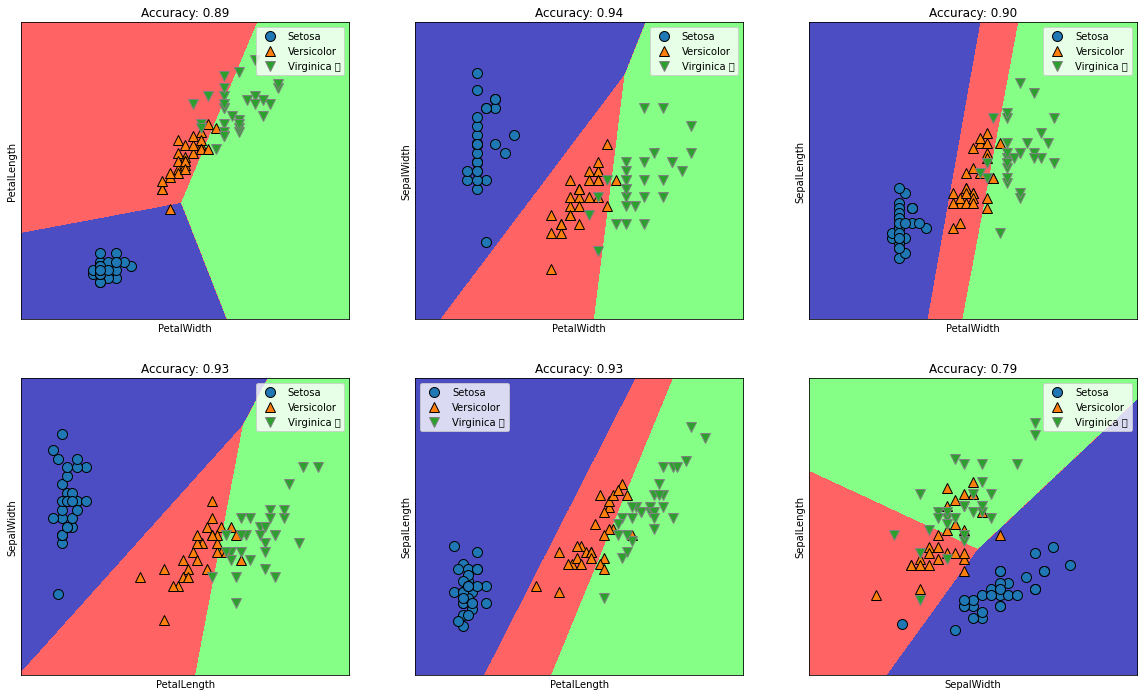

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for ax,feature_name in zip(axes.flatten(),pair_features):
  train_X = train[feature_name].to_numpy()# taking the training data features
  train_y=train.Species1.to_numpy()# output of our training data
  test_X= test[feature_name].to_numpy() # taking test data features
  test_y =test.Species1.to_numpy()   #output value of test data
  ovr_classifier,accuracy_score,svmAll = oneVsrest (train_X,train_y)
  plot_boundary_rest(test_X,test_y,ovr_classifier,ax,feature_name,accuracy_score,svmAll)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


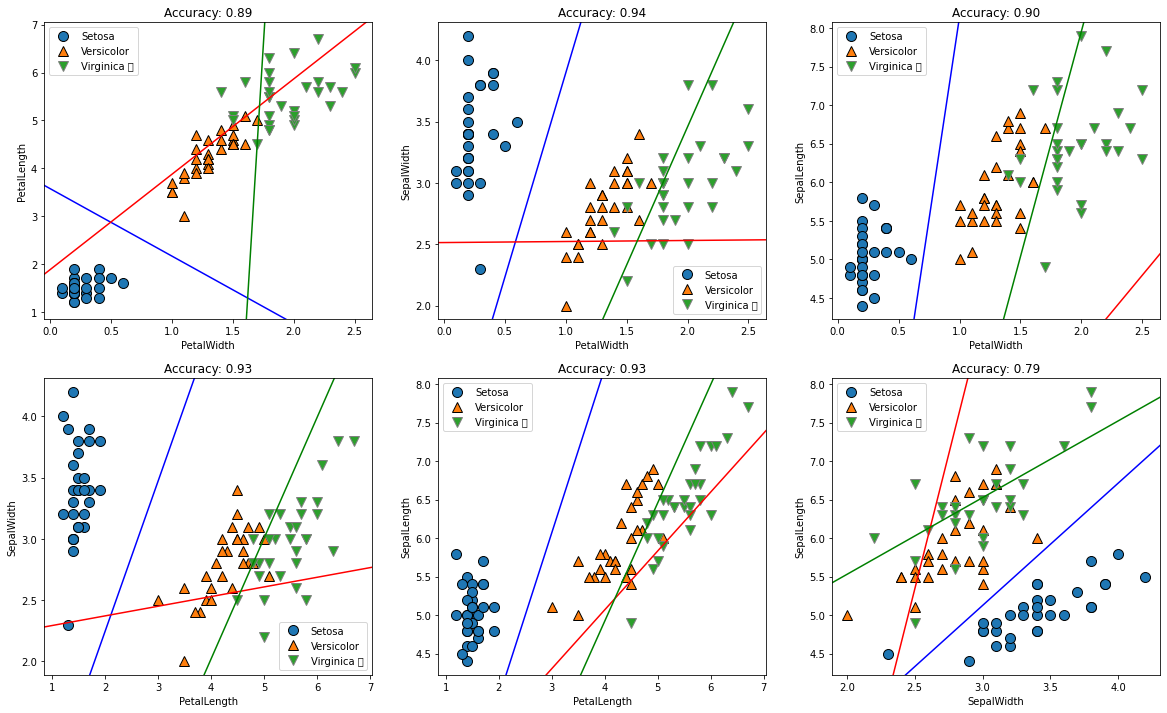

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for ax,feature_name in zip(axes.flatten(),pair_features):
  train_X = train[feature_name].to_numpy()# taking the training data features
  train_y=train.Species1.to_numpy()# output of our training data
  test_X= test[feature_name].to_numpy() # taking test data features
  test_y =test.Species1.to_numpy()   #output value of test data
  ovr_classifier,accuracy_score,svmAll = oneVsrest (train_X,train_y)
  plot_boundary(test_X,test_y,ovr_classifier,ax,feature_name,accuracy_score,svmAll,boundary=False,pairplot=True)
plt.show()

$$\underset{i}{max} {(w_i^Tx+b_i}) $$